<a href="https://colab.research.google.com/github/BatoolMM/PlantAI/blob/master/Viola_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
!pip install fastcore==1.0.9
!pip install utils
!pip install virtualbox
!pip install voila
!jupyter serverextension enable voila --sys-prefix

In [4]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from IPython.display import Image
import virtualbox
from ipywidgets import * 

# **Which Plant is This?**
This is simple Web application to classify the type of the plants I have in my home and provide instruction of taking care of it.

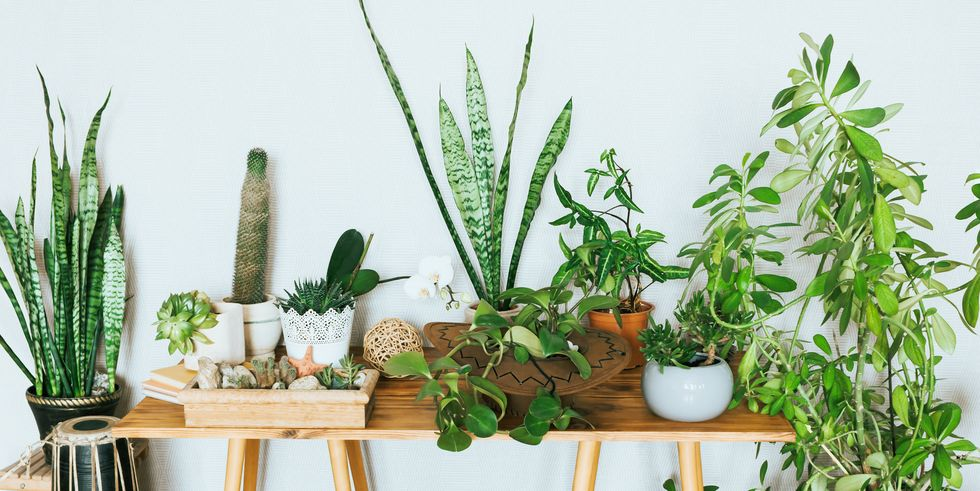

In [10]:
path = Path()
inf = load_learner('export.pkl')
upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

#**Do you want to know what is this plant!** 
# **Ask me anything!**

In [11]:
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = inf.predict(img)
    if pred =='Schefflera':
        lbl_pred.value = f'هذه شوفليرة'\
        f' \n بتول واثقة بنسبة {probs[pred_idx]:.2%} فقط'\
        f' \n Prediction: {pred}; Probability: {probs[pred_idx]:.02%}'
    elif pred =='Dieffenbachia':
        lbl_pred.value = f'هذه الدفنباخية'\
        f' \n بتول واثقة بنسبة {probs[pred_idx]:.2%} فقط'\
        f' \n Prediction: {pred}; Probability: {probs[pred_idx]:.02%}'
    elif pred =='Dracaena':
        lbl_pred.value = f'هذه دراسينيا'\
        f' \n بتول واثقة بنسبة {probs[pred_idx]:.2%} فقط'\
        f' \n Prediction: {pred}; Probability: {probs[pred_idx]:.02%}'
    else:
        lbl_pred.value = f'هذه بوتس'\
        f' \n بتول واثقة بنسبة {probs[pred_idx]:.2%} فقط'\
        f' \n Prediction: {pred}; Probability: {probs[pred_idx]:.02%}'

btn_run.on_click(on_click_classify)


In [13]:
upload.observe(on_click_classify, names=['data'])

In [16]:
VBox([widgets.Label('Select your plant!'),
      upload, btn_run, out_pl, lbl_pred])